In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# CSV-Datei laden
file_path = "FCAE_Astar_Comparison.csv"  # Passe den Pfad entsprechend an
data = pd.read_csv(file_path)

In [3]:
# table = tabulate(data, headers="keys", tablefmt="grid", showindex=False)
# print(table)
data

,Maze Size,Batchsize,Model,Path Accuracy (%),Inference Time GPU (Batch Load) (µs),Inference Time GPU (Single Load) (µs),Inference Time CPU (µs),Memory Usage GPU (MB),Memory Usage CPU (MB)
0,10x10,32,FCAE,99.990,70.389260,43.969016,256.862195,18.727051,19.109375
1,10x10,64,FCAE,99.985,37.457516,27.353037,193.809462,21.645508,29.652344
2,10x10,128,FCAE,99.975,33.789828,21.625982,168.371461,31.505859,33.234375
3,10x10,256,FCAE,99.975,23.255814,14.685483,96.457941,51.226562,37.171875
4,20x20,32,FCAE,98.910,74.389075,69.628145,722.765038,27.605469,21.785156
5,20x20,64,FCAE,99.075,54.670350,44.885999,624.144918,39.216797,33.078125
6,20x20,128,FCAE,99.070,47.582912,38.021171,783.581929,60.439453,54.894531
7,20x20,256,FCAE,99.145,44.814616,39.936554,648.746496,103.884766,90.707031
8,30x30,32,FCAE,89.410,99.435137,78.139026,649.262637,50.048340,25.195312
9,30x30,64,FCAE,89.535,57.357958,55.139694,586.131163,71.287109,43.734375


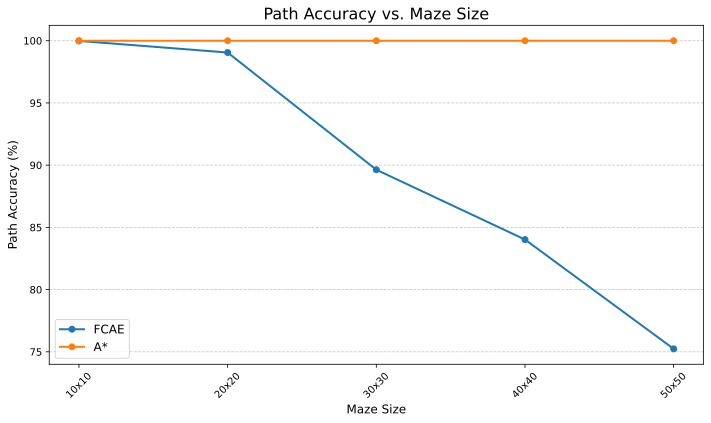

In [5]:
# Modelle und Farben definieren
models = ["FCAE", "A*"]
colors = {"FCAE": "#1f77b4", "A*": "#ff7f0e"}  # Blau für FCAE, Orange für A*

plt.figure(figsize=(10, 6))

# Linien für jedes Modell zeichnen
for model in models:
    model_data = data[data["Model"] == model]
    
    # Path Accuracy pro Maze Size mitteln
    aggregated_data = model_data.groupby("Maze Size")["Path Accuracy (%)"].mean().reset_index()
    plt.plot(
        aggregated_data["Maze Size"],
        aggregated_data["Path Accuracy (%)"],
        label=model,
        color=colors[model],
        marker="o",
        linewidth=2,
    )

# Achsenbeschriftung und Titel
plt.title("Path Accuracy vs. Maze Size", fontsize=16)
plt.xlabel("Maze Size", fontsize=12)
plt.ylabel("Path Accuracy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

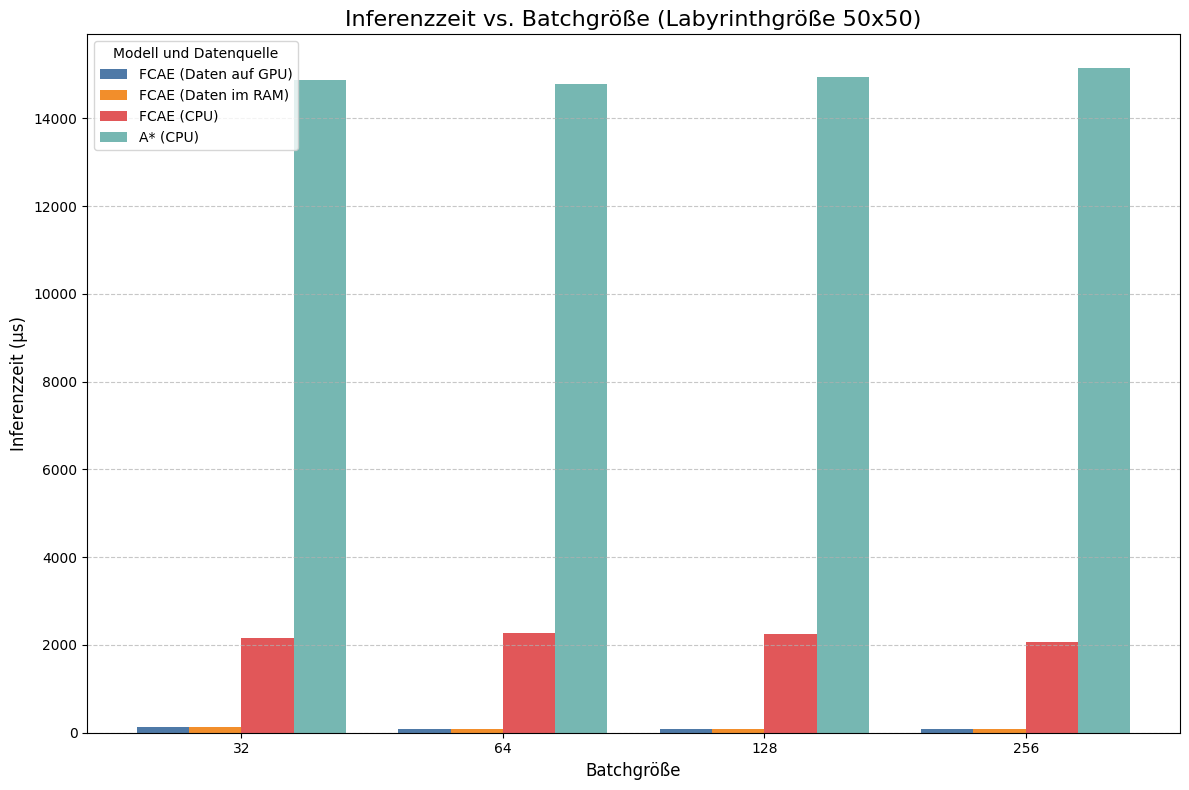

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
file_path = "FCAE_Astar_Comparison.csv"  # Passe den Pfad entsprechend an
data = pd.read_csv(file_path)

# Filter: Nur Labyrinthgröße 10x10
filtered_data = data[data["Maze Size"] == "50x50"]

# Farben definieren (harmonische Farben aus einer professionellen Farbpalette)
colors = {
    "FCAE (Daten auf GPU)": "#4E79A7",
    "FCAE (Daten im RAM)": "#F28E2B",
    "FCAE (CPU)": "#E15759",
    "A* (CPU)": "#76B7B2",
}

# Batchgrößen und Balkenpositionen
batch_sizes = filtered_data["Batchsize"].unique()
x_positions = np.arange(len(batch_sizes))
bar_width = 0.2

plt.figure(figsize=(12, 8))

# Balken für FCAE: Daten auf GPU (Single Load)
fcae_gpu = filtered_data[filtered_data["Model"] == "FCAE"]
plt.bar(
    x_positions - 1.5 * bar_width,
    fcae_gpu["Inference Time GPU (Single Load) (µs)"],
    width=bar_width,
    label="FCAE (Daten auf GPU)",
    color=colors["FCAE (Daten auf GPU)"],
)

# Balken für FCAE: Daten im RAM (Batch Load)
plt.bar(
    x_positions - 0.5 * bar_width,
    fcae_gpu["Inference Time GPU (Batch Load) (µs)"],
    width=bar_width,
    label="FCAE (Daten im RAM)",
    color=colors["FCAE (Daten im RAM)"],
)

# Balken für FCAE: CPU
plt.bar(
    x_positions + 0.5 * bar_width,
    fcae_gpu["Inference Time CPU (µs)"],
    width=bar_width,
    label="FCAE (CPU)",
    color=colors["FCAE (CPU)"],
)

# Balken für A*: CPU
astar_cpu = filtered_data[filtered_data["Model"] == "A*"]
plt.bar(
    x_positions + 1.5 * bar_width,
    astar_cpu["Inference Time CPU (µs)"],
    width=bar_width,
    label="A* (CPU)",
    color=colors["A* (CPU)"],
)

# Achsenbeschriftung und Titel
plt.title("Inferenzzeit vs. Batchgröße (Labyrinthgröße 50x50)", fontsize=16)
plt.xlabel("Batchgröße", fontsize=12)
plt.ylabel("Inferenzzeit (µs)", fontsize=12)
plt.xticks(x_positions, batch_sizes, fontsize=10)
plt.legend(fontsize=10, title="Modell und Datenquelle", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.yscale("log")  # Log-Skala für besseren Kontrast zwischen Werten
plt.tight_layout()

# Diagramm anzeigen
plt.show()


In [ ]:
import pandas as pd

# Daten laden
file_path = "FCAE_Astar_Comparison.csv"  # Passe den Pfad entsprechend an
data = pd.read_csv(file_path)

# A* Daten extrahieren und auf Batchsize und Maze Size indexieren
astar_data = data[data["Model"] == "A*"][["Maze Size", "Batchsize", "Inference Time CPU (µs)"]].set_index(["Maze Size", "Batchsize"])

# FCAE Daten extrahieren
fcae_data = data[data["Model"] == "FCAE"].copy()

# Sicherstellen, dass Batchgrößen und Maze Size korrekt gematcht sind (Outer Join für Vollständigkeit)
fcae_data = fcae_data.merge(astar_data, on=["Maze Size", "Batchsize"], suffixes=("", "_Astar"), how="left")

# Berechnung des Speedup-Faktors (A* / FCAE)
fcae_data["Speedup GPU (Daten auf GPU)"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time GPU (Single Load) (µs)"]
fcae_data["Speedup GPU (Daten im RAM)"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time GPU (Batch Load) (µs)"]
fcae_data["Speedup CPU"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time CPU (µs)"]

# Sicherstellen, dass die A* Daten auch in der finalen Datei enthalten sind
final_data = pd.concat([fcae_data, data[data["Model"] == "A*"]], ignore_index=True)

# Speichern als CSV
output_path = "FCAE_Astar_Comparison_with_Speedup.csv"
final_data.to_csv(output_path, index=False)

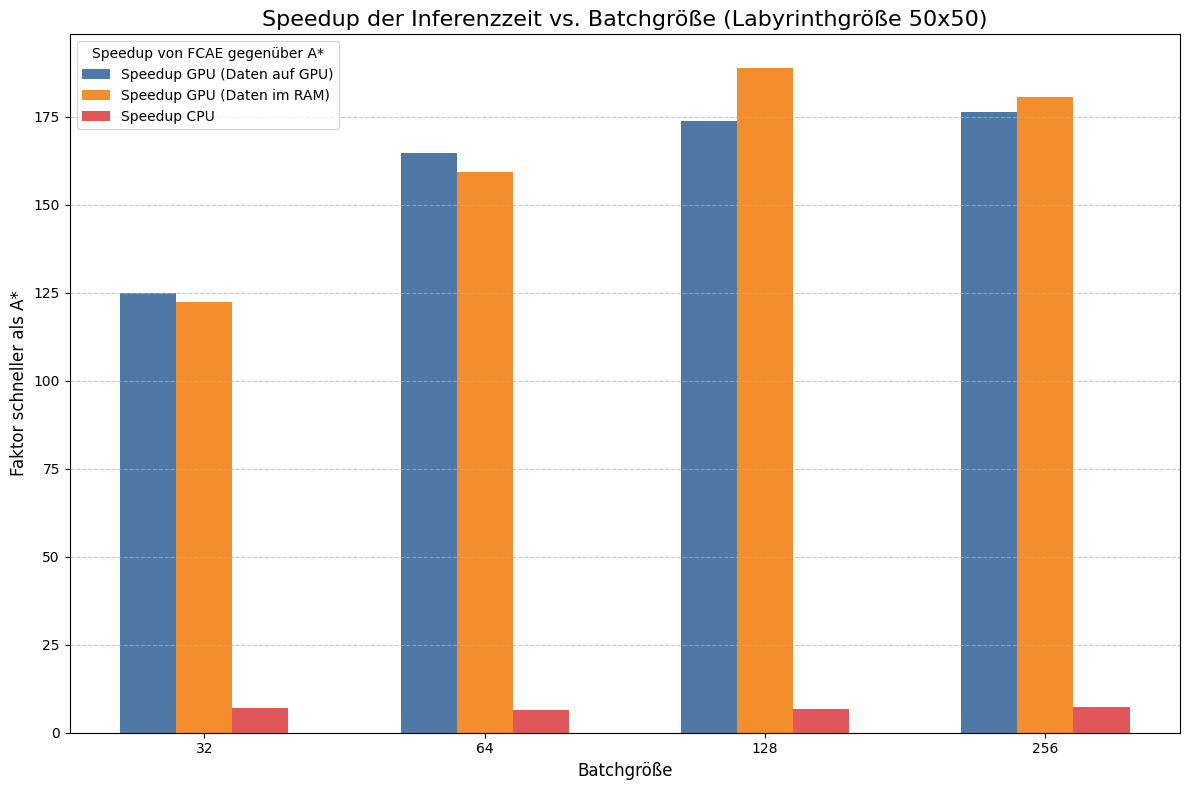

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
file_path = "FCAE_Astar_Comparison.csv"  # Passe den Pfad entsprechend an
data = pd.read_csv(file_path)

# Filter: Nur Labyrinthgröße 10x10
filtered_data = data[data["Maze Size"] == "50x50"].copy()  # Verhindert SettingWithCopyWarning

# A* Daten extrahieren und auf Batchsize indexieren
astar_data = filtered_data[filtered_data["Model"] == "A*"][["Batchsize", "Inference Time CPU (µs)"]].set_index("Batchsize")

# FCAE Daten extrahieren
fcae_data = filtered_data[filtered_data["Model"] == "FCAE"].copy()

# Sicherstellen, dass Batchgrößen korrekt gematcht sind (Outer Join für Vollständigkeit)
fcae_data = fcae_data.merge(astar_data, on="Batchsize", suffixes=("", "_Astar"), how="left")

# Berechnung des Speedup-Faktors (A* / FCAE)
fcae_data["Speedup GPU (Daten auf GPU)"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time GPU (Single Load) (µs)"]
fcae_data["Speedup GPU (Daten im RAM)"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time GPU (Batch Load) (µs)"]
fcae_data["Speedup CPU"] = fcae_data["Inference Time CPU (µs)_Astar"] / fcae_data["Inference Time CPU (µs)"]


# Batchgrößen und Balkenpositionen
batch_sizes = fcae_data["Batchsize"].unique()
x_positions = np.arange(len(batch_sizes))
bar_width = 0.2

# Farben für Speedup
colors = {
    "Speedup GPU (Daten auf GPU)": "#4E79A7",
    "Speedup GPU (Daten im RAM)": "#F28E2B",
    "Speedup CPU": "#E15759",
}

plt.figure(figsize=(12, 8))

# Balken für Speedup GPU (Daten auf GPU)
plt.bar(
    x_positions - bar_width,
    fcae_data["Speedup GPU (Daten auf GPU)"],
    width=bar_width,
    label="Speedup GPU (Daten auf GPU)",
    color=colors["Speedup GPU (Daten auf GPU)"],
)

# Balken für Speedup GPU (Daten im RAM)
plt.bar(
    x_positions,
    fcae_data["Speedup GPU (Daten im RAM)"],
    width=bar_width,
    label="Speedup GPU (Daten im RAM)",
    color=colors["Speedup GPU (Daten im RAM)"],
)

# Balken für Speedup CPU
plt.bar(
    x_positions + bar_width,
    fcae_data["Speedup CPU"],
    width=bar_width,
    label="Speedup CPU",
    color=colors["Speedup CPU"],
)

# Achsenbeschriftung und Titel
plt.title("Speedup der Inferenzzeit vs. Batchgröße (Labyrinthgröße 50x50)", fontsize=16)
plt.xlabel("Batchgröße", fontsize=12)
plt.ylabel("Faktor schneller als A*", fontsize=12)
plt.xticks(x_positions, batch_sizes, fontsize=10)
plt.legend(fontsize=10, title="Speedup von FCAE gegenüber A*")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()
